<a href="https://colab.research.google.com/github/JackPerry0/Neural-Networks/blob/main/NeuralNetwork_NewsWires_MultiClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

print(len(train_data))
print(len(test_data))
print(train_data[10]) # word indicies
print(train_labels) # 0-45 topic index


2110848/2110848 [==============================] - 0s 0us/step
8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
[ 3  4  3 ... 25  3 25]


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)


550378/550378 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 45ms/step - loss: 2.7793 - accuracy: 0.4630 - val_loss: 1.8975 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.5781 - accuracy: 0.6793 - val_loss: 1.4077 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 0s 29ms/step - loss: 1.1983 - accuracy: 0.7387 - val_loss: 1.2112 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.9834 - accuracy: 0.7865 - val_loss: 1.0950 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.8168 - accuracy: 0.8212 - val_loss: 1.0334 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6835 - accuracy: 0.8485 - val_loss: 0.9689 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5771 - accuracy: 0.8742 - val_loss: 0.9435 - val_accuracy: 0.8020
Epoch 8/20
16

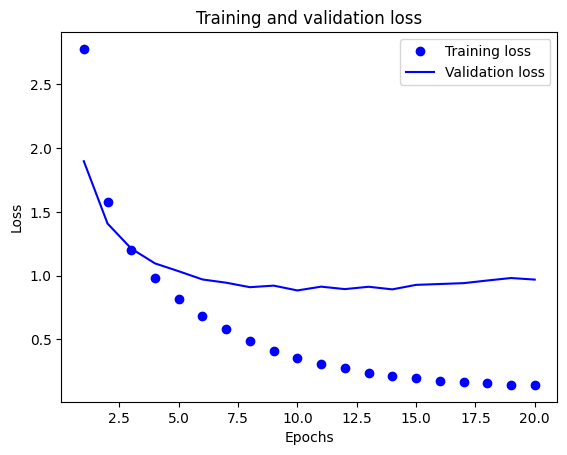

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

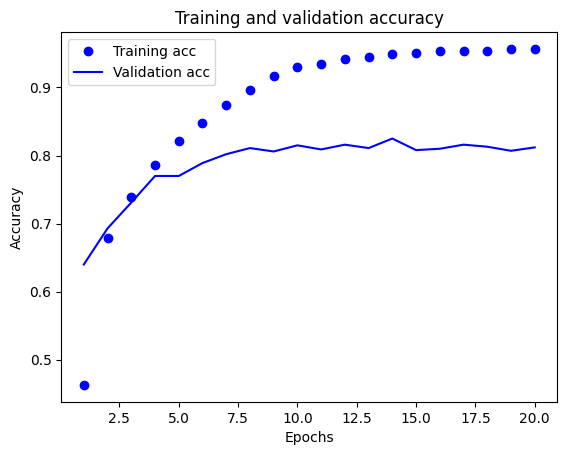

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc,"bo", label="Training acc")
plt.plot(epochs, val_acc,"b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

71/71 [==============================] - 0s 3ms/step - loss: 1.0491 - accuracy: 0.7930
[1.0491241216659546, 0.792965292930603]


In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()


0.19412288512911843

In [ ]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 3ms/step


(46,)

In [ ]:
np.sum(predictions[0])

0.99999976

In [ ]:
np.argmax(predictions[0])

3

different loss function. Same mathematically but different interface.

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer = "rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Introducing a bottleneck within the intermediate layers

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))



Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 2.7899 - accuracy: 0.3696 - val_loss: 1.9332 - val_accuracy: 0.5850
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.6186 - accuracy: 0.6071 - val_loss: 1.4960 - val_accuracy: 0.6280
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3126 - accuracy: 0.6691 - val_loss: 1.3730 - val_accuracy: 0.6670
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1547 - accuracy: 0.7070 - val_loss: 1.3211 - val_accuracy: 0.6780
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.0426 - accuracy: 0.7340 - val_loss: 1.2949 - val_accuracy: 0.6880
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9599 - accuracy: 0.7527 - val_loss: 1.2774 - val_accuracy: 0.6880
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.8873 - accuracy: 0.7716 - val_loss: 1.2595 - val_accuracy: 0.6980
Epoch 8/20
63

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 46) are incompatible


In [ ]:
predictions = model.predict(test_data)
predictions[0]